In [ ]:
### Mounting the Drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# necessary import for loading the images and labels

In [ ]:
#path = '/content/drive/MyDrive/Colab Notebooks/CNN/BelgiumTSC/Training'
#!ls '/content/drive/MyDrive/Colab Notebooks/CNN/BelgiumTSC/Training'

In [ ]:
import os
from PIL import Image
import numpy as np
from skimage.color import rgb2gray
from skimage import io
from skimage import transform
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Function used to load data
def load_data(path):
  # Empty list to hold image and its label
  data = []
  label = []
  p=1 # To print progress
  #Loading all the contents from the folder location passed and iterating
  for items in os.listdir(path) :
    # Printing the foldername as logger
    print(f'Folder name : {items} Progress : {round(100 * (p/len(os.listdir(path))))} %')
    #print(f'Loading data for folder : {items}')

    #To check if its a directory or a file. Move in oly if its a directory and open it to expose files
    if os.path.isdir(path+'/'+items) :    
      # Loading all the files in the folder
      for filename in os.listdir(path+'/'+items) : 
        #Checking if it is a file and ending with .ppm
        if os.path.isfile(path+'/'+items+'/'+filename) and filename.endswith("ppm"):
          # Reading the image and storing it in list 
          data.append(io.imread(path+'/'+items+'/'+filename))
          # assigning the label same as folder name
          label.append(int(items))
    p+=1

  return (data,label)

In [ ]:
print(f'Logs for training Dataset')
(train_images, train_labels) = load_data('/content/drive/MyDrive/Colab Notebooks/CNN/BelgiumTSC/Training')

print(f'\nLogs for Testing Dataset')
#(test_images, test_labels) = load_data('/content/drive/MyDrive/Colab Notebooks/CNN/BelgiumTSC/Testing')

Logs for training Dataset
Folder name : Readme.txt Progress : 2 %
Folder name : 00001 Progress : 3 %
Folder name : 00005 Progress : 5 %
Folder name : 00009 Progress : 6 %
Folder name : 00003 Progress : 8 %
Folder name : 00007 Progress : 10 %
Folder name : 00006 Progress : 11 %
Folder name : 00000 Progress : 13 %
Folder name : 00008 Progress : 14 %
Folder name : 00004 Progress : 16 %
Folder name : 00002 Progress : 17 %
Folder name : 00014 Progress : 19 %
Folder name : 00011 Progress : 21 %
Folder name : 00018 Progress : 22 %
Folder name : 00016 Progress : 24 %
Folder name : 00017 Progress : 25 %
Folder name : 00012 Progress : 27 %
Folder name : 00010 Progress : 29 %
Folder name : 00019 Progress : 30 %
Folder name : 00015 Progress : 32 %
Folder name : 00013 Progress : 33 %
Folder name : 00026 Progress : 35 %
Folder name : 00021 Progress : 37 %
Folder name : 00023 Progress : 38 %
Folder name : 00022 Progress : 40 %
Folder name : 00029 Progress : 41 %
Folder name : 00020 Progress : 43 %
Fo

In [ ]:
import pickle

In [ ]:
# Dumping the list as pickle objects so that the loading time of images could be saved

with open('/content/drive/MyDrive/Colab Notebooks/CNN/train_image.pkl', 'wb') as f:
  pickle.dump(train_images, f)

with open('/content/drive/MyDrive/Colab Notebooks/CNN/train_labels.pkl', 'wb') as f:
  pickle.dump(train_labels, f)

with open('/content/drive/MyDrive/Colab Notebooks/CNN/test_image.pkl', 'wb') as f:
  pickle.dump(test_images, f)

with open('/content/drive/MyDrive/Colab Notebooks/CNN/test_labels.pkl', 'wb') as f:
  pickle.dump(test_labels, f)

NameError: ignored

In [ ]:
# To Load the pickle file 

import pickle

with open('/content/drive/MyDrive/Colab Notebooks/CNN/train_image.pkl', 'rb') as f:
  train_images = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/CNN/train_labels.pkl', 'rb') as f:
  train_labels = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/CNN/test_image.pkl', 'rb') as f:
  test_images = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/CNN/test_labels.pkl', 'rb') as f:
  test_labels = pickle.load(f)




In [ ]:
# Function to check the shape of 10 images and the length of the list
def check_shape_length(images, label):
  for i in range(0,20):
    print(f'Shape of Image {i} : {images[i].shape}')
  print(f'\nLength of the images : {len(images)} & Lables : {len(label)}')

In [ ]:
#Checking training data shape and lenght 
check_shape_length(train_images,train_labels)

Shape of Image 0 : (82, 88, 3)
Shape of Image 1 : (107, 118, 3)
Shape of Image 2 : (57, 61, 3)
Shape of Image 3 : (57, 61, 3)
Shape of Image 4 : (128, 75, 3)
Shape of Image 5 : (73, 79, 3)
Shape of Image 6 : (100, 112, 3)
Shape of Image 7 : (132, 151, 3)
Shape of Image 8 : (264, 167, 3)
Shape of Image 9 : (80, 84, 3)
Shape of Image 10 : (178, 176, 3)
Shape of Image 11 : (51, 54, 3)
Shape of Image 12 : (144, 160, 3)
Shape of Image 13 : (49, 50, 3)
Shape of Image 14 : (63, 67, 3)
Shape of Image 15 : (42, 42, 3)
Shape of Image 16 : (44, 45, 3)
Shape of Image 17 : (42, 44, 3)
Shape of Image 18 : (51, 52, 3)
Shape of Image 19 : (44, 48, 3)

Length of the images : 4575 & Lables : 4575


In [ ]:
#Checking testing data shape and lenght 
check_shape_length(test_images,test_labels)

Shape of Image 0 : (55, 58, 3)
Shape of Image 1 : (98, 110, 3)
Shape of Image 2 : (41, 44, 3)
Shape of Image 3 : (142, 103, 3)
Shape of Image 4 : (88, 74, 3)
Shape of Image 5 : (67, 58, 3)
Shape of Image 6 : (50, 57, 3)
Shape of Image 7 : (74, 83, 3)
Shape of Image 8 : (52, 57, 3)
Shape of Image 9 : (75, 88, 3)
Shape of Image 10 : (159, 170, 3)
Shape of Image 11 : (167, 194, 3)
Shape of Image 12 : (116, 71, 3)
Shape of Image 13 : (152, 81, 3)
Shape of Image 14 : (130, 73, 3)
Shape of Image 15 : (96, 99, 3)
Shape of Image 16 : (61, 70, 3)
Shape of Image 17 : (48, 53, 3)
Shape of Image 18 : (45, 49, 3)
Shape of Image 19 : (53, 55, 3)

Length of the images : 2520 & Lables : 2520


In [ ]:
# Function to reshape the image to the given height and width
def transform_images(images,height,width):
  transformed_images = [transform.resize(image,(height,width)) for image in images]
  return  np.array(transformed_images)

In [ ]:
# CAlling the Function to reshape the size
train_trans_images = transform_images(train_images, 121, 121)
test_trans_images = transform_images(test_images, 121, 121)

In [ ]:
#Function to print 1 images from all classes
def show_images_of_all_classes(images, labels):
  #Fetching all unique classes indexes
  indexes = []
  #Unique values in the list
  for elem in set(train_labels):
    indexes.append(train_labels.index(elem))

  num_classes = len(indexes)
  print(f'Number of Unique Classes : {num_classes}')

  # Columns for subplot
  num_cols = 10

  # Dynamically calculating number of rows  
  if num_classes % num_cols == 0:
      num_rows =  num_classes / num_cols
  else:
      num_rows = int(num_classes / num_cols) + 1

  plt.figure(figsize=(15,15))
  i = 1
  for ind in indexes:
    plt.subplot(num_rows,num_cols, i)
    i+=1
    plt.axis('off')
    plt.imshow(images[ind])
    plt.title(f'Class {labels[ind]}')
  plt.show()

Number of Unique Classes : 62


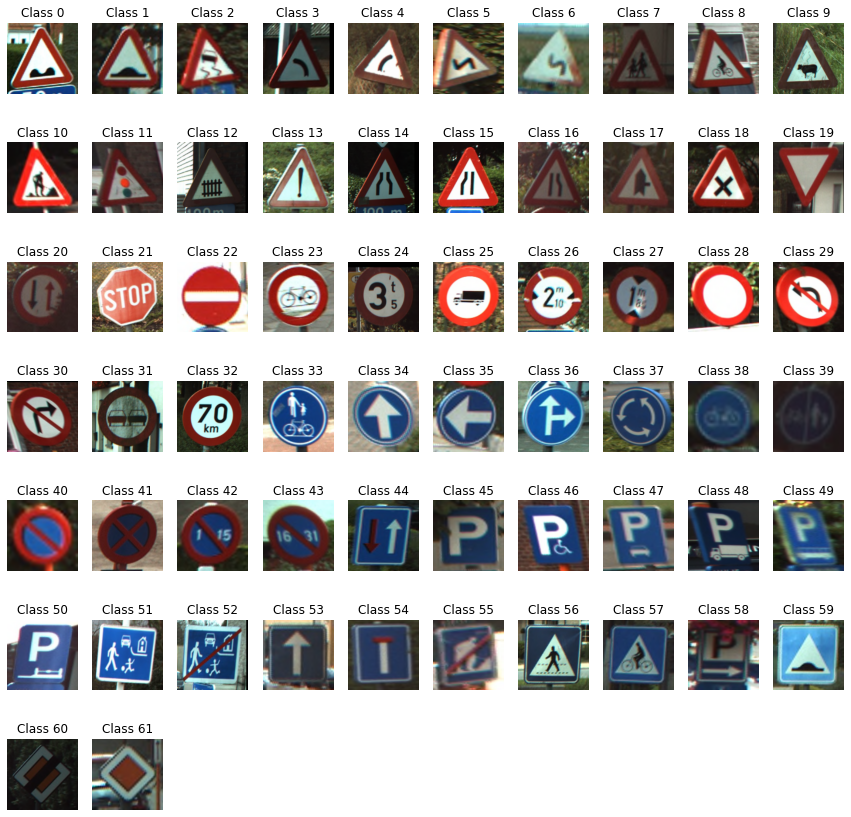

In [ ]:
show_images_of_all_classes(train_trans_images, train_labels)

In [ ]:
#Creating labels on the classes

classnames = {
              0 : 'Warning for a bad road surface',
              1 : 'Warning for a speed bump',
              2 : 'Warning for a slippery road surface',
              3 : 'Warning for a curve to the left',
              4 : 'Warning for a curve to the right',
              5 : 'Warning for a double curve, first left then right',                                                    # Merge Classes 5 & 6 later
              6 : 'Warning for a double curve, first left then right',
              7 : 'Watch out for children ahead',
              8 : 'Watch out for  cyclists',
              9 : 'Watch out for cattle on the road',
              10: 'Watch out for roadwork ahead',
              11: 'Traffic light ahead',
              12: 'Watch out for railroad crossing with barriers ahead',
              13: 'Watch out ahead for unknown danger',
              14: 'Warning for a road narrowing',
              15: 'Warning for a road narrowing on the left',
              16: 'Warning for a road narrowing on the right',
              17: 'Warning for side road on the right',
              18: 'Warning for an uncontrolled crossroad',
              19: 'Give way to all drivers',
              20: 'Road narrowing, give way to oncoming drivers',
              21: 'Stop and give way to all drivers',
              22: 'Entry prohibited (road with one-way traffic)',
              23: 'Cyclists prohibited',
              24: 'Vehicles heavier than indicated prohibited',
              25: 'Trucks prohibited',
              26: 'Vehicles wider than indicated prohibited',
              27: 'Vehicles higher than indicated prohibited',
              28: 'Entry prohibited',
              29: 'Turning left prohibited',
              30: 'Turning right prohibited',
              31: 'Overtaking prohibited',
              32: 'Driving faster than indicated prohibited (speed limit)',
              33: 'Mandatory shared path for pedestrians and cyclists',
              34: 'Driving straight ahead mandatory',
              35: 'Mandatory left',
              36: 'Driving straight ahead or turning right mandatory',
              37: 'Mandatory direction of the roundabout',
              38: 'Mandatory path for cyclists',
              39: 'Mandatory divided path for pedestrians and cyclists',
              40: 'Parking prohibited',
              41: 'Parking and stopping prohibited',
              42: '',
              43: '',
              44: 'Road narrowing, oncoming drivers have to give way',
              45: 'Parking is allowed',
              46: 'parking for handicapped',
              47: 'Parking for motor cars',
              48: 'Parking for goods vehicles',
              49: 'Parking for buses',
              50: 'Parking only allowed on the sidewalk',
              51: 'Begin of a residential area',
              52: 'End of the residential area',
              53: 'Road with one-way traffic',
              54: 'Dead end street',
              55: '', 
              56: 'Crossing for pedestrians',
              57: 'Crossing for cyclists',
              58: 'Parking exit',
              59: 'Information Sign : Speed bump',
              60: 'End of the priority road',
              61: 'Begin of a priority road'
    }

In [ ]:
# Normaize Data
x_train = train_trans_images / 255.0
x_test = test_trans_images / 255.0

In [ ]:
def create_cnn_model(train_images_dims, num_of_classes, filter_size, num_convolutions, num_strides, padd):

  model  = tf.keras.Sequential()

  #Conv1
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu', kernel_initializer='he_uniform', padding=padd, input_shape= train_images_dims[1:]))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
    
  #Conv2
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu', padding=padd, kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  
  #Conv3
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu', padding=padd, kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
  
  #Conv4
  model.add(tf.keras.layers.Conv2D(int(num_convolutions),(filter_size,filter_size),activation='relu', padding=padd, kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))

  #Conv5
  model.add(tf.keras.layers.Conv2D(int(num_convolutions) ,(filter_size,filter_size),activation='relu', padding=padd, kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=num_strides))
  
  model.add(tf.keras.layers.Flatten())
  
  model.add(tf.keras.layers.Reshape((33,33))) # Adjustment for LSTM
  '''
  model.add(tf.keras.layers.LSTM(128, activation='relu', return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.5))
  '''

  model.add(tf.keras.layers.LSTM(128, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))

  '''
  model.add(tf.keras.layers.LSTM(128, activation='relu')) #, return_sequences=True
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))

  #Dense 1
  model.add(tf.keras.layers.Dense(121,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))

  #Dense 2
  model.add(tf.keras.layers.Dense(1512,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))

  #Dense 3
  model.add(tf.keras.layers.Dense(100,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  '''

  model.add(tf.keras.layers.Dense(100, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(150, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(100, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))

  #Output Layer
  model.add(tf.keras.layers.Dense(num_of_classes,activation = 'softmax'))

  return model

In [ ]:
# create_cnn_model(image_dimension = (128,128,3), num_Classes ,filter_size,num_convolutions=512, num_strides,  padding='same',)
model_cnn = create_cnn_model(train_trans_images.shape,len(set(train_labels)),int(3), 121, int(2) ,'same')

In [ ]:
model_cnn.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 121, 121, 121)     3388      
_________________________________________________________________
batch_normalization_4 (Batch (None, 121, 121, 121)     484       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 60, 121)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 121)       131890    
_________________________________________________________________
batch_normalization_5 (Batch (None, 60, 60, 121)       484       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 121)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 121)      

In [ ]:
x_train.shape

(4575, 121, 121, 3)

In [ ]:
np.array(train_labels).shape

(4575,)

In [ ]:
model_cnn.fit(x_train, np.array(train_labels), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
143/143 [==============================] - 59s 189ms/step - loss: 2.9928 - accuracy: 0.3152
Epoch 2/20
143/143 [==============================] - 26s 183ms/step - loss: 1.4373 - accuracy: 0.6448
Epoch 3/20
143/143 [==============================] - 26s 178ms/step - loss: 0.9366 - accuracy: 0.7666
Epoch 4/20
143/143 [==============================] - 26s 179ms/step - loss: 0.6371 - accuracy: 0.8378
Epoch 5/20
143/143 [==============================] - 26s 180ms/step - loss: 0.5043 - accuracy: 0.8647
Epoch 6/20
143/143 [==============================] - 26s 179ms/step - loss: 0.3728 - accuracy: 0.8999
Epoch 7/20
143/143 [==============================] - 26s 179ms/step - loss: 0.3010 - accuracy: 0.9193
Epoch 8/20
143/143 [==============================] - 26s 181ms/step - loss: 0.2553 - accuracy: 0.9316
Epoch 9/20
143/143 [==============================] - 26s 178ms/step - loss: 0.2040 - accuracy: 0.9438
Epoch 10/20
143/143 [==============================] - 26s 180ms/step - l

In [ ]:
test_loss, test_acc = model_cnn.evaluate(x_test, np.array(test_labels), verbose=2)

print('\nTest accuracy:', test_acc)

79/79 - 5s - loss: 0.2299 - accuracy: 0.9520

Test accuracy: 0.9519841074943542


In [ ]:
aaaaa

NameError: ignored

In [ ]:
 train_trans_images.shape[1:]

(121, 121, 3)

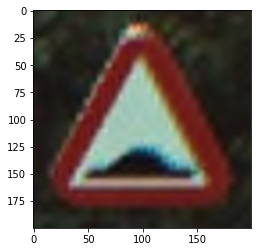

In [ ]:
 img = Image.open('/content/drive/MyDrive/Colab Notebooks/CNN/BelgiumTSC/Training/00001/00025_00000.ppm') #.convert("L")
img = img.resize((200,200))
im2arr = np.array(img)
im2arr = rgb2gray(im2arr)
im2arr = im2arr.reshape(1,200,200,1) #(batch_size, height, width, channels)
# Predicting the Test set results
#np.argmax(new_model.predict(im2arr), axis=-1) # returns the position of max value

plt.imshow(img)